## Regional Coordination and specialisation within the extended system for perception

Haxby & Gobbini (2007) outline a delineation between core and extended face percepton systems
Core - involved in perceptual processing, while extended system is involved in semantic processing. Originally they thought that regions in the extended system are involved in different aspects of semantics, figure(1)

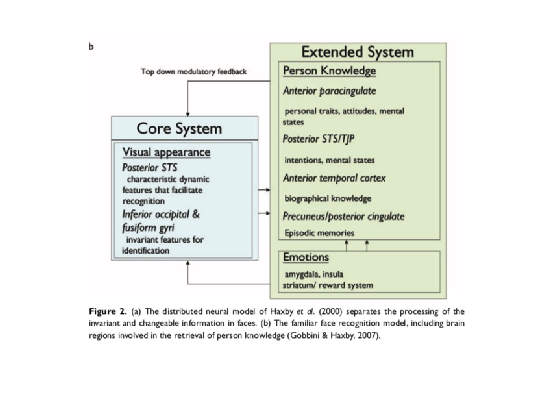

In [1]:
imshow('/Users/aidasaglinskas/Desktop/Screenshots/image.jpg')

Putative regional specialisations are

 - vmPFC: Traits, attudes, mental states
 - TPJ (AG): intentions & mental states
 - ATL: biographical knowledge
 - PREC: Episodic memories
 - Amy: Emotions

## Results

fMRI data from 24 participants has been collected while they performed different person knowledge tasks

<img width="486" alt="screenshot 2019-01-31 at 15 34 13" src="https://user-images.githubusercontent.com/15108226/52061014-b59ae100-256d-11e9-82cc-ae4f60b3aeb3.png">

In [2]:
loadMR;
cd '/Users/aidasaglinskas/Google Drive/Aidas/Data_words/Scripts/'
aBeta

Loaded 7 variables

aBeta = 

  struct with fields:

    fmat_raw: [21x12x20 double]
        fmat: [21x10x20 double]
      r_lbls: {21x1 cell}
      t_lbls: {12x1 cell}
        trim: [1x1 struct]
      list_R: {21x1 cell}
      list_T: {12x1 cell}
    wmat_raw: [21x12x24 double]
        wmat: [21x10x24 double]



Shaping and re-ordering the data

In [3]:
rlbls = aBeta.r_lbls;
    rlbls = strrep(rlbls,'.mat','');
    rlbls = strrep(rlbls,'-left','-L');
    rlbls = strrep(rlbls,'-right','-R');
    rlbls = strrep(rlbls,'Angular','AG');
    rlbls = strrep(rlbls,'Precuneus','PREC');
    rlbls = strrep(rlbls,'Amygdala','AMY');
tlbls10 = aBeta.t_lbls(1:10);

In [4]:
r_ord = [13 14 9 10 19 20 3 4 17 18 21 7 8 11 12 15 16 5 6 1 2];
t_ord = [3 4 2 9 1 5 7 8 6 10];

%r_ord = 1:21
%t_ord = 1:10
aBeta.wmat = aBeta.wmat(r_ord,t_ord,:);
aBeta.wmat_raw = aBeta.wmat_raw(r_ord,[t_ord 11 12],:);
rlbls = rlbls(r_ord);
tlbls10 = tlbls10(t_ord);

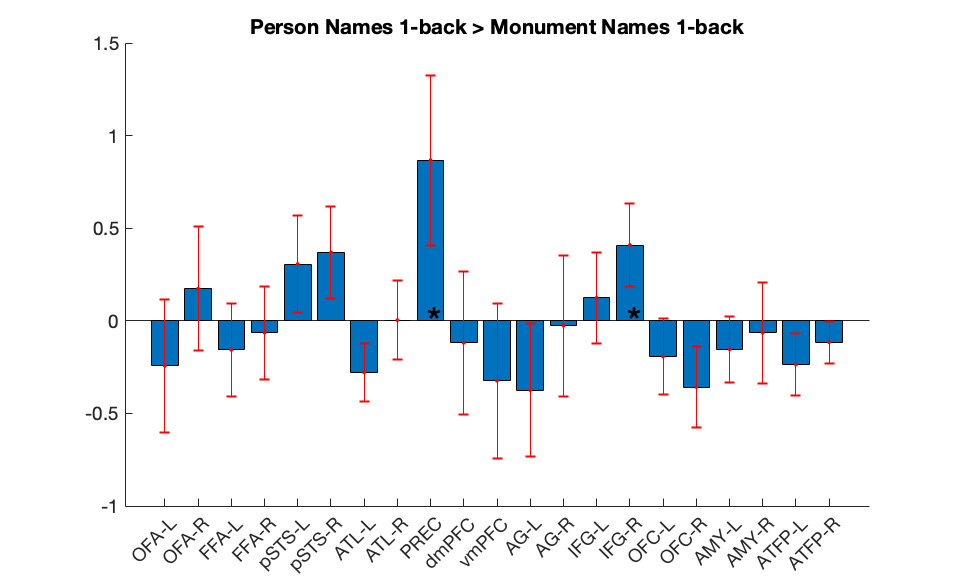

In [24]:
%plot --size 1000,600
m = aBeta.wmat_raw(:,11,:) - aBeta.wmat_raw(:,12,:);
m = squeeze(m);

func_plot_tbar_plot(m',rlbls,0); % Bonferroni Corrected
title('Person Names 1-back > Monument Names 1-back','fontsize',20);
set(gca,'FontSize',14);

In [31]:
[H,P,CI,STATS] = ttest(m(ismember(rlbls,'PREC'),:),0,'tail','right');
t_statement(STATS,P);

t(23) = 1.89,p = 0.036


None of ROIs were selective for people names > monument names after correcting for multiple comparisons (all _p_ > .036 (unc))

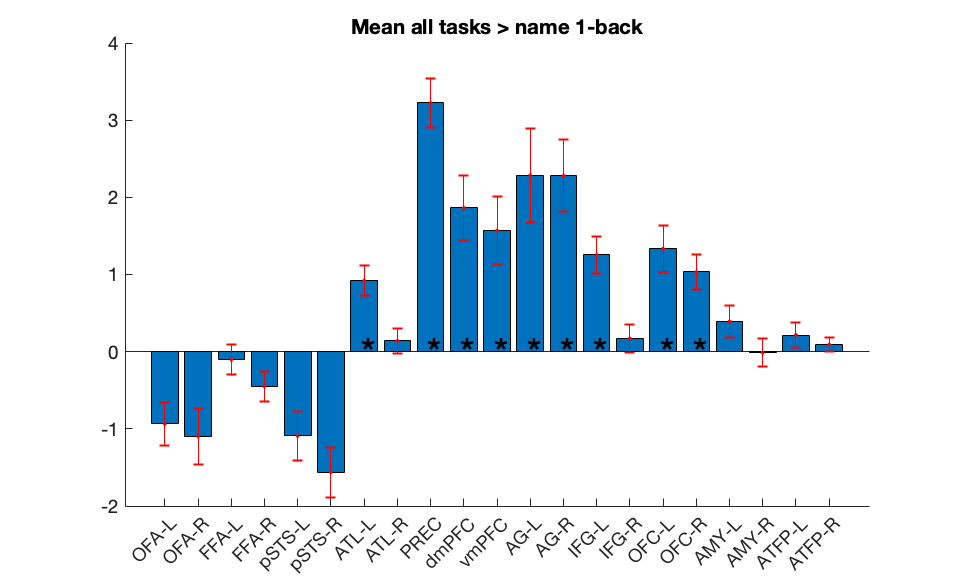

In [7]:
%plot --size 1000,600
m = mean(aBeta.wmat,2);
m = squeeze(m);

func_plot_tbar_plot(m',rlbls,1) % Bonf corrected
title('Mean all tasks > name 1-back','fontsize',20)
set(gca,'FontSize',14)

Regional and Task similarity across all (core + extended ROIs)

ROIs:21,Tasks:10,Subs:24
> In linkage (line 171)
  In func_plot_dendMat (line 29)


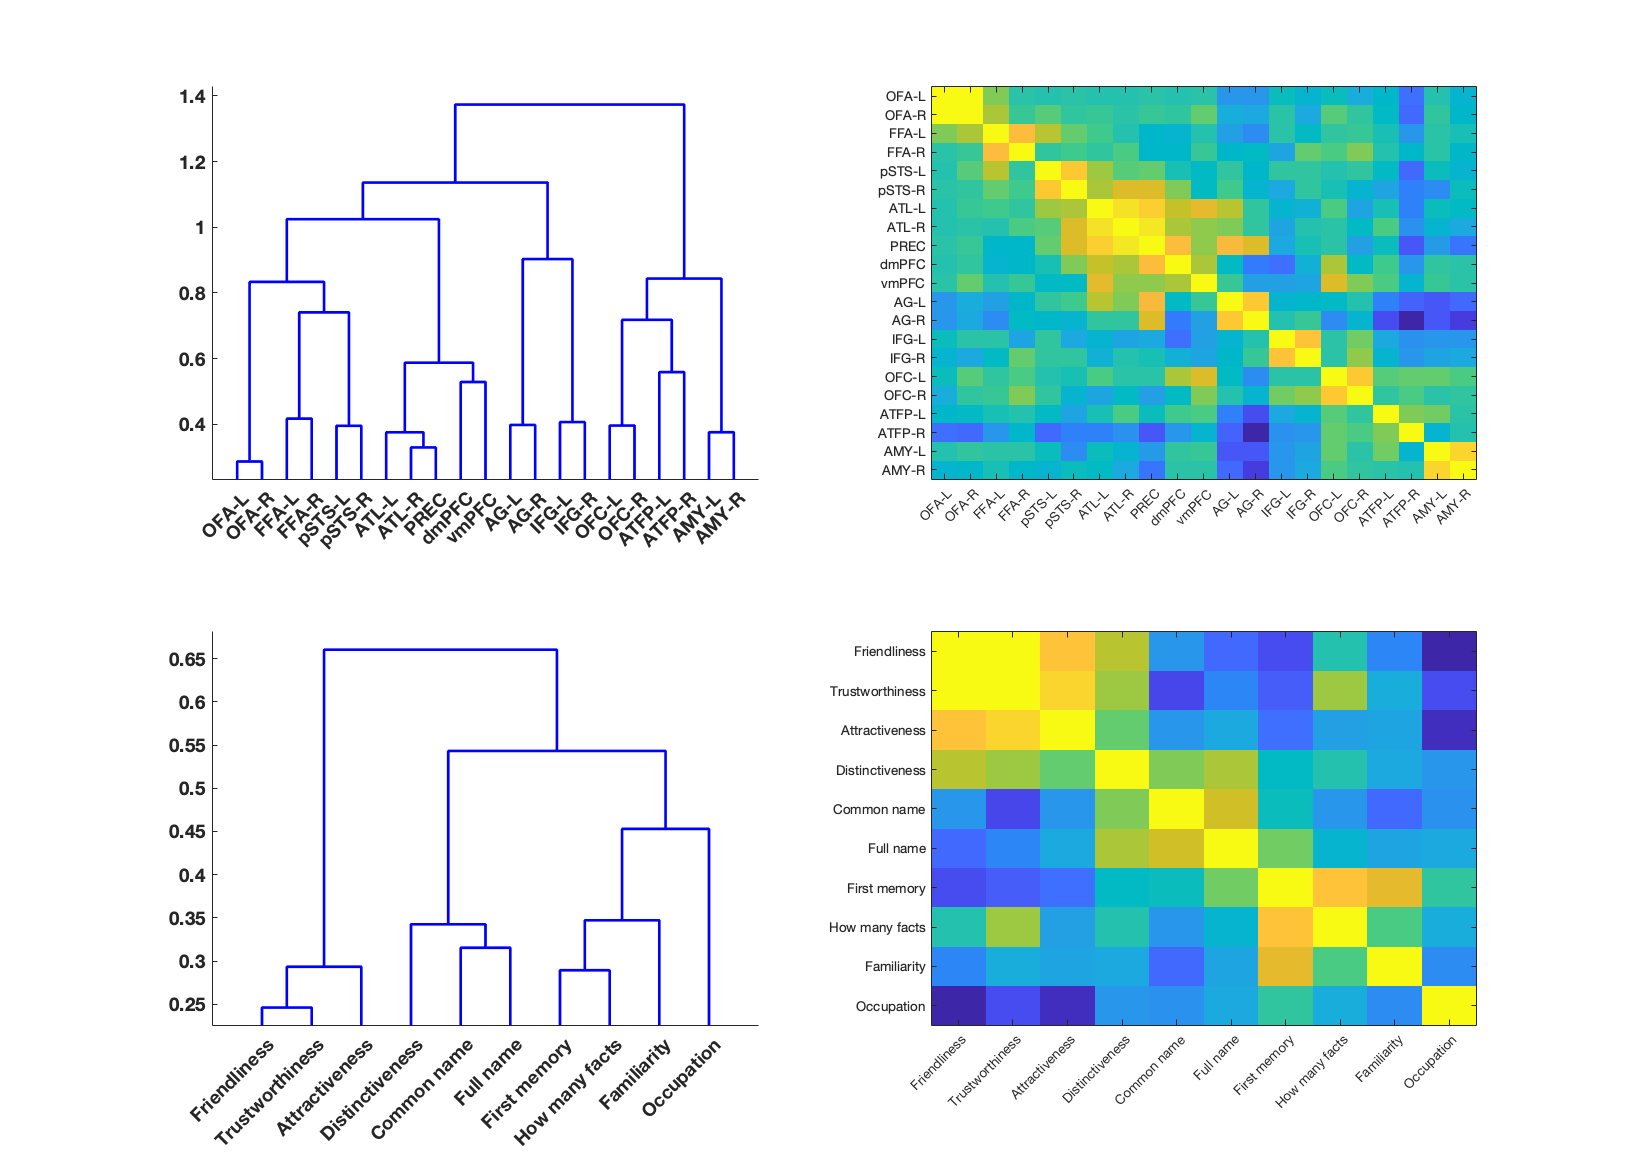

In [8]:
%plot --size 1700,1200
cmats = func_make_cmat(aBeta.wmat); % Make similarity matrices
res = func_plot_dendMat({mean(cmats{1},3) mean(cmats{2},3)},{rlbls tlbls10}); %Plot dendrograms

Tiny Matrix, averaged across task domain and ROI hemisphere

In [9]:
task_groups = {{'Friendliness' 'Trustworthiness'} {'Attractiveness' 'Distinctiveness'} {'First memory' 'Familiarity'} {'How many facts' 'Occupation'} {'Common name' 'Full name'}};
task_groups_leg = {'Social' 'Physical' 'Episodic' 'Biographical' 'Nominal'};

roi_groups = {{'OFA-L' 'OFA-R'} {'FFA-L' 'FFA-R'} {'pSTS-L' 'pSTS-R'} {'ATL-L' 'ATL-R'} {'PREC'} {'dmPFC'} {'vmPFC'} {'AG-L' 'AG-R'} {'IFG-L' 'IFG-R'} {'OFC-L' 'OFC-R'} {'AMY-L' 'AMY-R'} {'ATFP-L' 'ATFP-R'}};
roi_groups_leg = {'OFA' 'FFA' 'pSTS' 'ATL' 'PREC' 'dmPFC' 'vmPFC' 'AG' 'IFG' 'OFC' 'AMY' 'ATFP'};

tiny_mat = [];
for r = 1:length(roi_groups_leg)
for t = 1:length(task_groups_leg)

v = aBeta.wmat(ismember(rlbls,roi_groups{r}),ismember(tlbls10,task_groups{t}),:);
tiny_mat(r,t,:) = mean(mean(v,1),2);
end
end


tiny.mat = tiny_mat;
tiny.rlbls = roi_groups_leg;
tiny.tlbls = task_groups_leg;


% Trim away core regions
tiny.rlbls(1:3) = [];
tiny.mat(1:3,:,:) = [];


tiny


tiny = 

  struct with fields:

      mat: [9x5x24 double]
    rlbls: {1x9 cell}
    tlbls: {'Social'  'Physical'  'Episodic'  'Biographical'  'Nominal'}



In [10]:
tiny.mat = tiny.mat - mean(tiny.mat,2); % remove regional mean, cleaner tuning profiles
m = mean(tiny.mat,3);
s = std(tiny.mat,[],3);
s = s ./ sqrt(size(tiny.mat,3));

from Haxby & Gobbini (2007) paper: 

Regional contributions: 

 - vmPFC: Traits, attudes, mental states
 - TPJ (AG): intentions & mental states
 - ATL: biographical knowledge
 - PREC: Episodic memories
 - Amy: Emotions

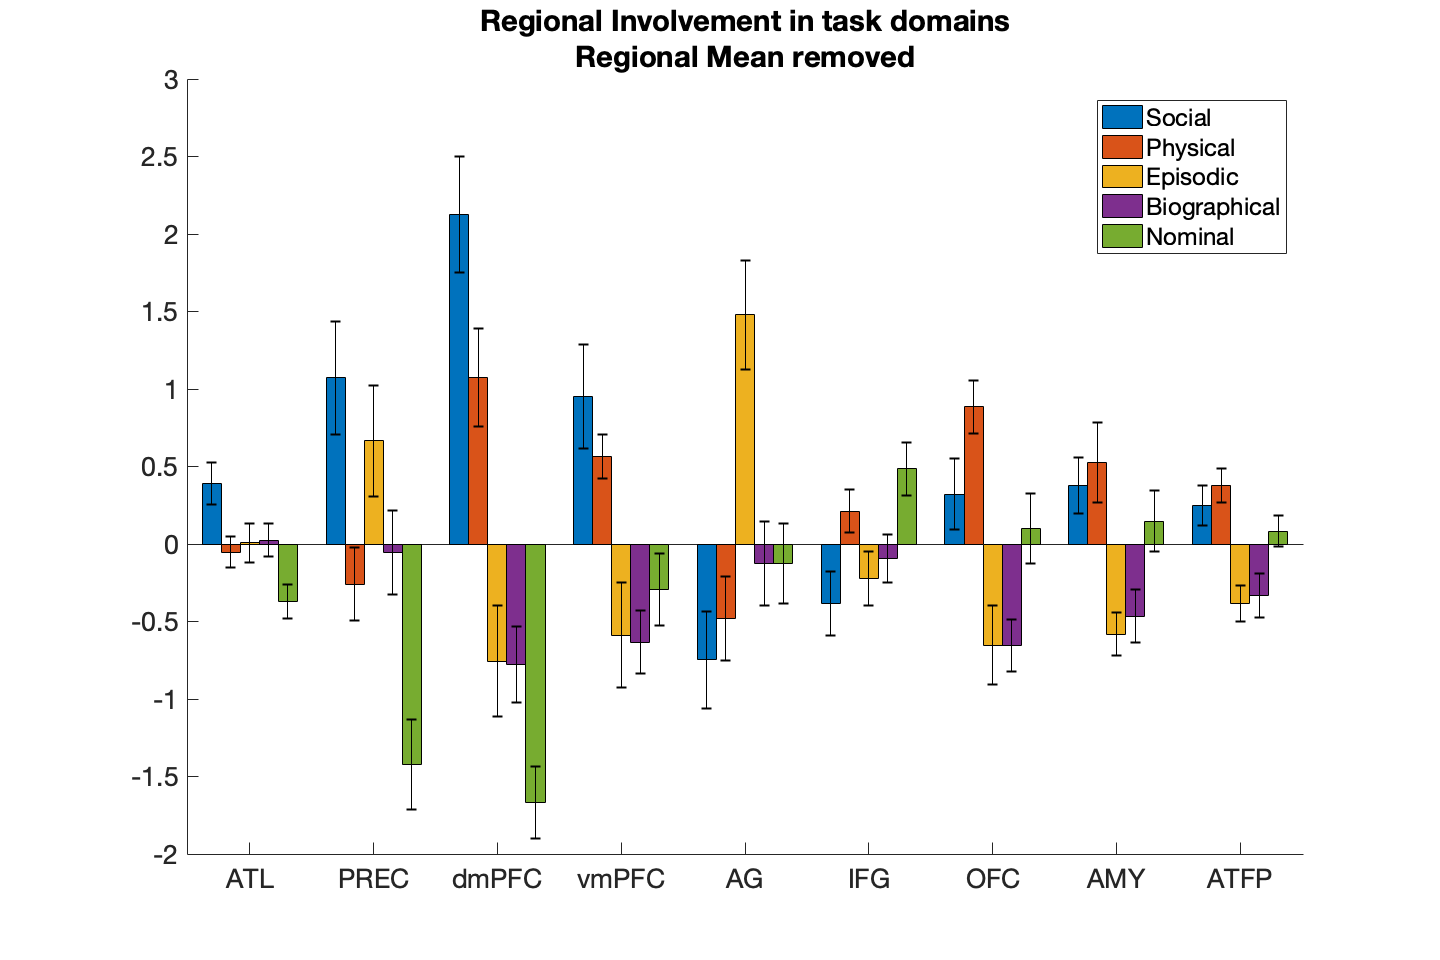

In [11]:
%plot --size 1500,1000
func_grouped_errorbar(m,s)
xticklabels(tiny.rlbls);
legend(tiny.tlbls,'location','best')
box off
set(gca,'fontsize',20);
title({'Regional Involvement in task domains' 'Regional Mean removed'})

Figure shows that: 

- Social and Physical knowldge engaged similar regions
- Episodic knowledge engaged Precuneus and AG
- ATL is tuned to social knowledge

ROI:ATFP
Social > Episodic
t(23) = 3.23,p = 0.004
Social > Biographical
t(23) = 3.00,p = 0.006
Physical > Episodic
t(23) = 4.38,p < 0.001
Physical > Biographical
t(23) = 3.11,p = 0.005
Physical > Nominal
t(23) = 2.73,p = 0.012
Nominal > Episodic
t(23) = 2.80,p = 0.010


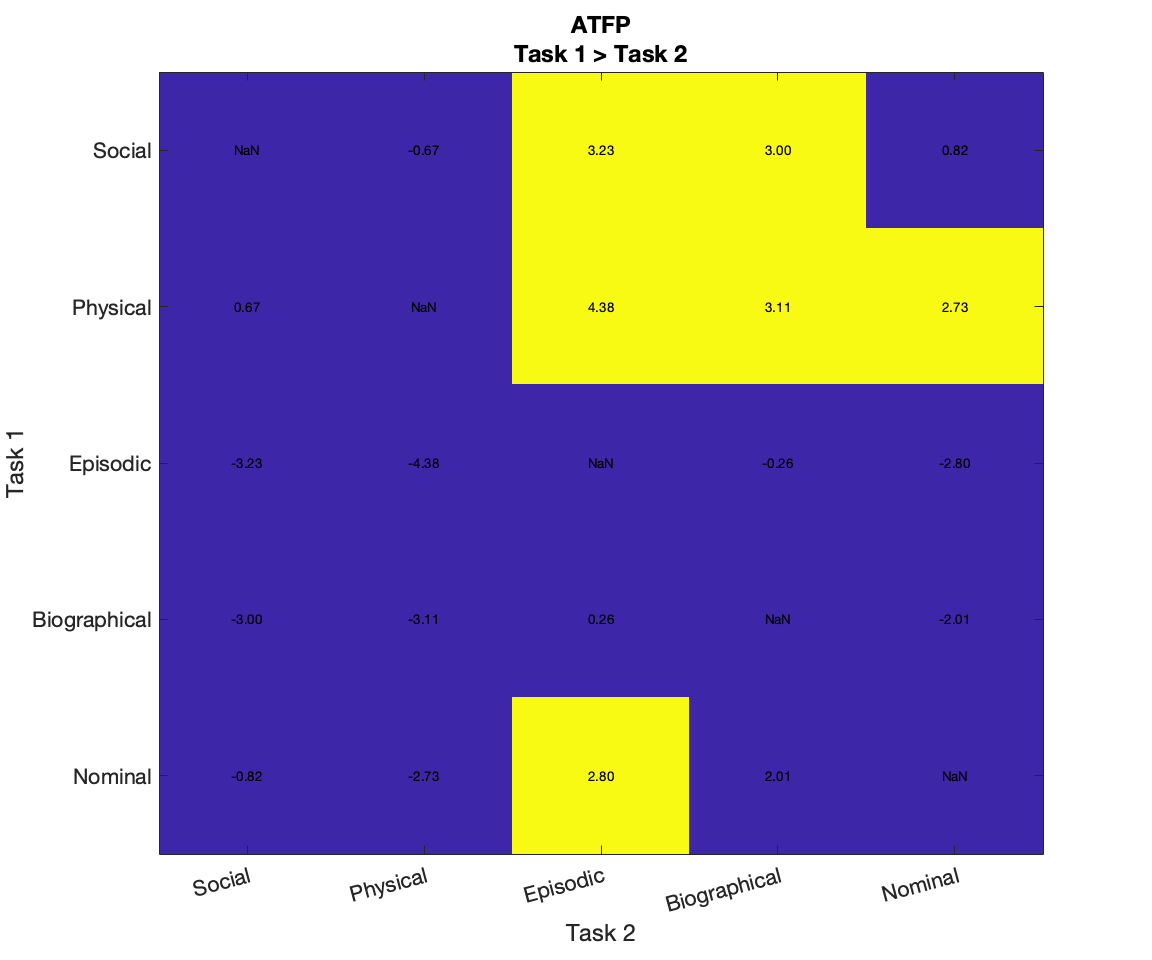

In [12]:
%plot --size 1200,1000
% STATS for individual regions
roi = 'ATFP';
disp(sprintf('ROI:%s',roi))
tmat = [];
for t1 = 1:5
for t2 = 1:5
v1 = squeeze(tiny.mat(ismember(tiny.rlbls,roi),t1,:));
v2 = squeeze(tiny.mat(ismember(tiny.rlbls,roi),t2,:));

t_thresh = 2.069; % p < .05
%t_thresh = 3.104; % p < .005
%t_thresh = 3.767; % p < .001
[H,P,CI,STATS] = ttest(v1,v2);
tmat(t1,t2) = STATS.tstat;
    
    if ~isnan(H)
    if H & STATS.tstat > 0
    disp(sprintf('%s > %s',tiny.tlbls{t1},tiny.tlbls{t2}))
    t_statement(STATS,P);
    end
    end
end
end

add_numbers_to_mat(tmat,tiny.tlbls);

ylabel('Task 1');
xlabel('Task 2');
title({roi 'Task 1 > Task 2'},'fontsize',20);
set(gca,'CLim',[t_thresh-.001 t_thresh])
set(gca,'fontsize',16)